<IPython.core.display.Javascript object>


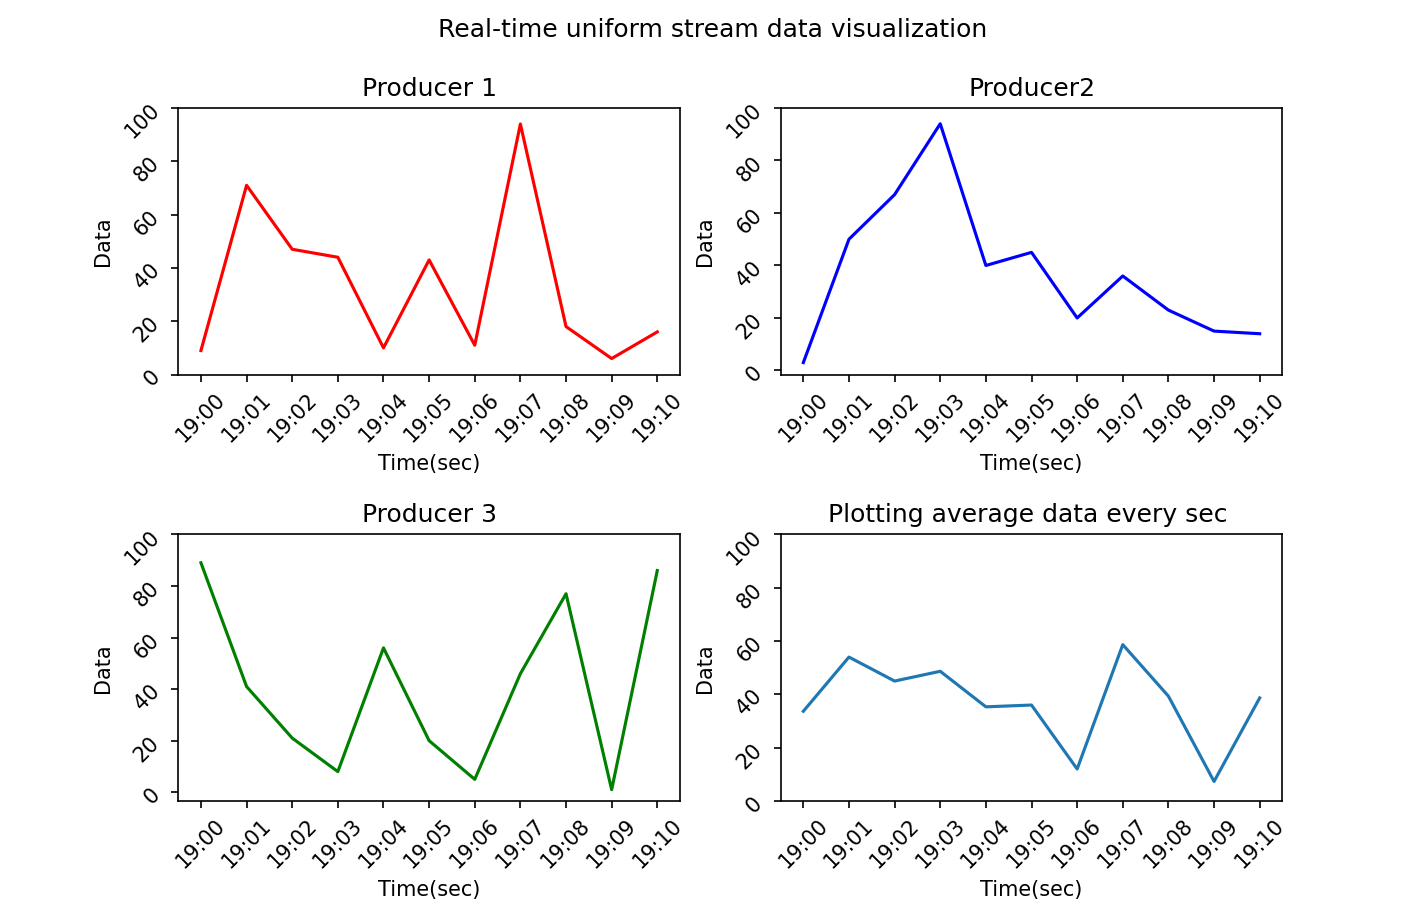

KeyboardInterrupt: 

In [1]:
# import statements
from kafka3 import KafkaConsumer
import datetime as dt
from json import loads
import statistics
import matplotlib.pyplot as plt
import statistics

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

#configuration
hostip = "192.168.100.4" #change to your machine IP address
topic = 'Week9-Topic2'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   # consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.6)
        ax1 = fig.add_subplot(221)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
                                   
        ax2 = fig.add_subplot(222)
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Value')
                                   
        ax3 = fig.add_subplot(223)
        ax3.set_xlabel('Time')
        ax3.set_ylabel('Value')
                                   
        ax4 = fig.add_subplot(224)
        ax4.set_xlabel('Time')
        ax4.set_ylabel('Value')
        
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax1, ax2, ax3, ax4
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax1, ax2, ax3, ax4):
    try:
        # container for x and y values
        # x4 and y4 holds the average values
        x1, y1, x2, y2, x3, y3, ave_x, ave_y, temp = [], [], [], [], [], [], [], [], []
        firstIteration = True
        # print('Waiting for messages')
        for message in consumer:
            message = message.value
            # print(message)
            if 'producer05-1' in message:
                x1.append(message['datetime'])
                y1.append(message['producer05-1'])
            if 'producer05-2' in message:
                x2.append(message['datetime'])
                y2.append(message['producer05-2'])
            if 'producer05-3' in message:
                x3.append(message['datetime'])
                y3.append(message['producer05-3'])
      
        
            # we start plotting only when we have 10 data points
            if len(y1) > 10 and len(y2) > 10 and len(y3) > 10:
                if (firstIteration):
                    firstIteration = False
                    for i, datetime in enumerate(x1):
                        ave_x.append(datetime)
                        ave_y.append(statistics.mean([y1[i], y2[i], y3[i]]))
                else:
                    ave_x.append(message['datetime'])
                    ave_y.append(statistics.mean([y1[-1], y2[-1], y3[-1]]))
                    
                ax1.clear()
                ax2.clear()
                ax3.clear()
                ax4.clear()

                ax1.plot(x1, y1, color='r')
                ax2.plot(x2, y2, color='b')
                ax3.plot(x3, y3, color='g')
                ax4.plot(ave_x, ave_y)

#                 ax1.set_xlim(left=max(0, i[0] - 50), right=i[0])
                ax1.set_title("Producer 1")
                ax1.set_xlabel("Time(sec)")
                ax1.set_ylabel("Data")

#                 ax2.set_xlim(left=max(0, i[1] - 50), right=i[1])
                ax2.set_title("Producer2")
                ax2.set_xlabel("Time(sec)")
                ax2.set_ylabel("Data")

#                 ax3.set_xlim(left=max(0, i[2] - 50), right=i[2])
                ax3.set_title("Producer 3")
                ax3.set_xlabel("Time(sec)")
                ax3.set_ylabel("Data")

#                 ax4.set_xlim(left=max(0, i[3] - 50), right=i[3])
                ax4.set_title("Plotting average data every sec ")
                ax4.set_xlabel("Time(sec)")
                ax4.set_ylabel("Data")
            
                ax1.set_yticks([0,20,40,60,80,100])
                ax1.tick_params(labelrotation=45)
                ax2.set_yticks([0,20,40,60,80,100])
                ax2.tick_params(labelrotation=45)
                ax3.set_yticks([0,20,40,60,80,100])
                ax3.tick_params(labelrotation=45)
                ax4.set_yticks([0,20,40,60,80,100])
                ax4.tick_params(labelrotation=45)
            
                fig.canvas.draw()
                x1.pop(0) 
                y1.pop(0)
                x2.pop(0)
                y2.pop(0)
                x3.pop(0) 
                y3.pop(0)
                ave_x.pop(0) 
                ave_y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax1, ax2, ax3, ax4 = init_plots()
    consume_messages(consumer, fig, ax1, ax2, ax3, ax4)
    
    